<a href="https://colab.research.google.com/github/navinagrawalchung07/Spotify-ML-Predictions/blob/main/DATASCI112_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** https://www.kaggle.com/datasets/akiboy96/spotify-dataset

This dataset has about 35853 songs from the 1960s all the way to the 2010s. It includes various audio features of songs such as danceability which is calculated from beat strength, tempo stability, and overall tempo; energy; key; loudness; mode; speechiness which is presence of spoken words in a track; acousticness which is a confidence measure from 0.0 to 1.0 of whether the track is acoustic; tempo; and more, along with their popularity metrics.


**Reading in the dataset + import statements:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#add any necessary import statements here
df_url = "https://raw.githubusercontent.com/navinagrawalchung07/Spotify-ML-Predictions/main/spotify_dataset.csv"
df = pd.read_csv(df_url)
df


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


**Question 1:** Can we predict the popularity of a song based on its audio features?

**Data to use:**  energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms

**Approach:** Use linear regression with feature scaling, using StandardScaler, to predict the danceability score.

**Evaluation:** Evaluate using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) through cross-validation.


In [ ]:
features = ['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target = 'popularity'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_params = {'kneighborsclassifier__n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(knn_pipeline, knn_params,
                        cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
print("Best KNN Params:", knn_grid.best_params_)
evaluate_model(knn_grid.best_estimator_, X_test, y_test)

lr_pipeline = make_pipeline(StandardScaler(), LinearRegression())
lr_grid = GridSearchCV(lr_pipeline, {}, cv=5, scoring='neg_mean_squared_error')
lr_grid.fit(X_train, y_train)
print("Best Linear Regression Params:", lr_grid.best_params_)
evaluate_model(lr_grid.best_estimator_, X_test, y_test)

Best KNN Params: {'kneighborsclassifier__n_neighbors': 9}
MAE: 0.26, MSE: 0.26, RMSE: 0.51
Best Linear Regression Params: {}
MAE: 0.40, MSE: 0.19, RMSE: 0.44


In [ ]:
knn_pipeline = make_pipeline(StandardScaler(),
                             KNeighborsRegressor(n_neighbors=10))
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [ ]:
random_song_features = pd.DataFrame([{
    'energy': 0.8,
    'key': 5,
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.5,
    'tempo': 120.0,
    'duration_ms': 200000
}])

# Predict the popularity of the random song
predicted_popularity = knn_pipeline.predict(random_song_features)

print(f"Predicted Popularity: {predicted_popularity[0]}")

Predicted Popularity: 1.0


The K-Nearest Neighbors (KNN) model with 10 neighbors appears to perform better than the Linear Regression model in predicting the popularity of a song based on its audio features.

**Question 2:** Which audio feature influences the popularity of the song most?


**Data to use:** energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms.

**Approach:** Use a Random Forest Regressor with feature scaling through StandardScaler to predict the popularity of songs. After training the model, analyze the feature importance scores to determine which audio feature has the greatest influence on song popularity.

**Evaluation:** Evaluate the feature importance through the Random Forest model's output and visualize the relative importance of each feature using a bar plot. This will help to identify the most influential audio feature for predicting song popularity.

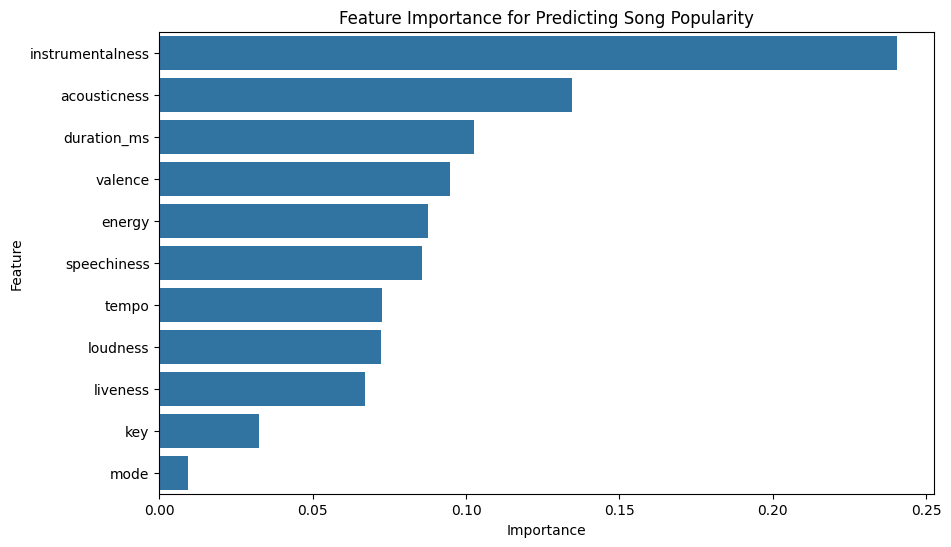

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

features = ['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target = 'popularity'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with feature scaling and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Extract feature importances
rf_model = pipeline.named_steps['rf']
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Song Popularity')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Question 3:** After TV/internet came, was there a huge change in type of songs?

**Data to use:**  danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

**Additional Information:** Release year to categorize songs into pre- and post-TV/internet eras.

**Approach:** Apply Linear Regression with feature scaling using MinMaxScaler to predict the energy score.

**Evaluation:** Use SSE, MAE, MSE, and RMSE to evaluate model performance through cross-validation.

In [ ]:
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


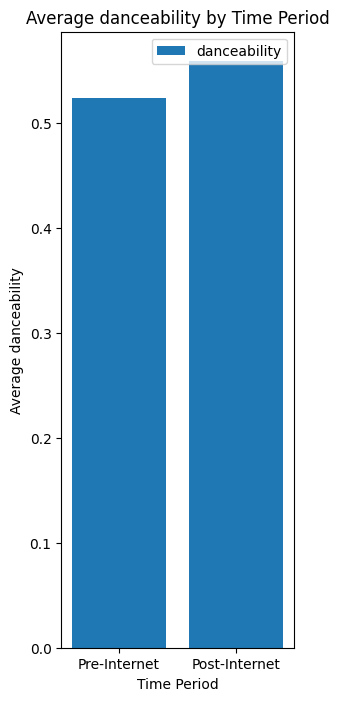

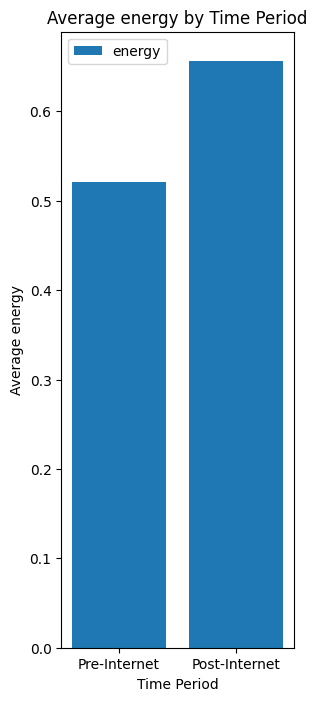

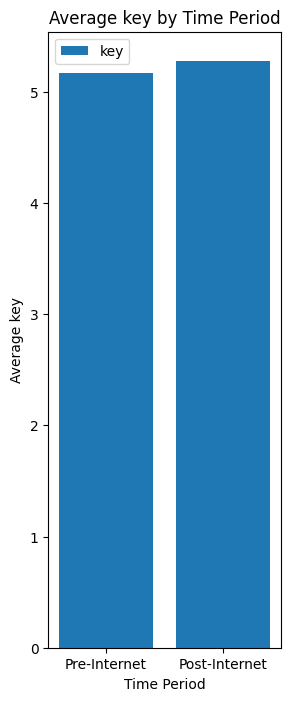

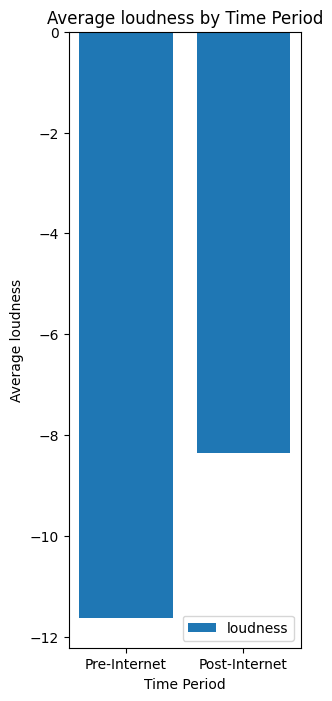

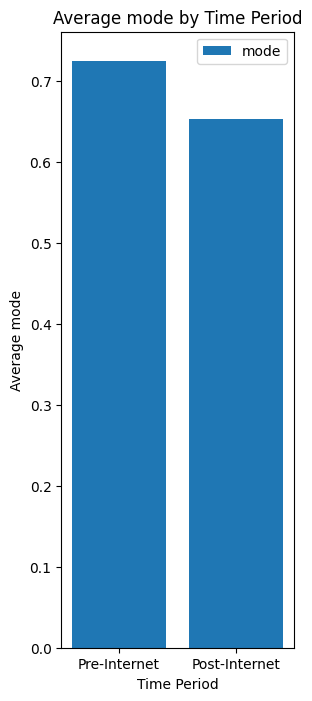

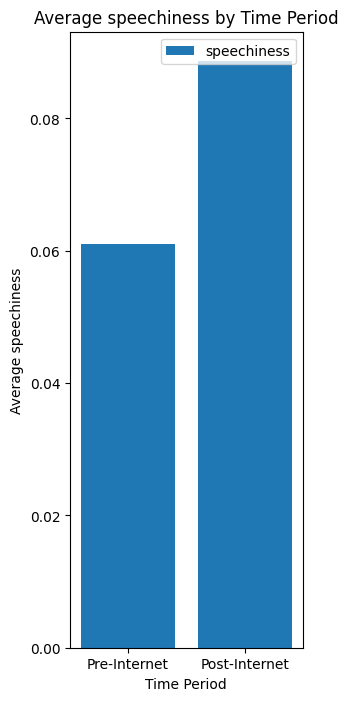

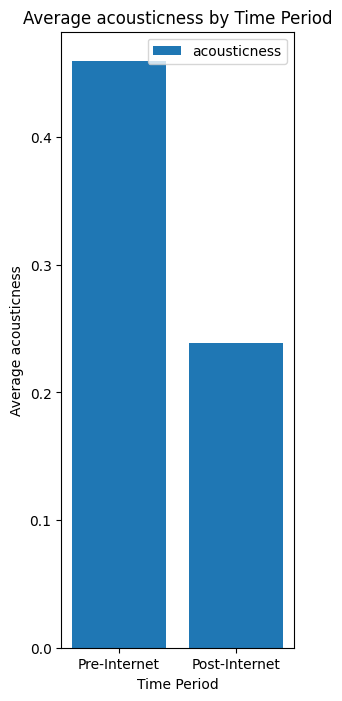

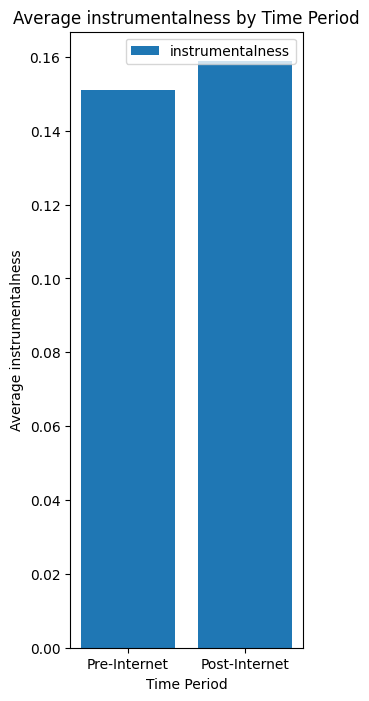

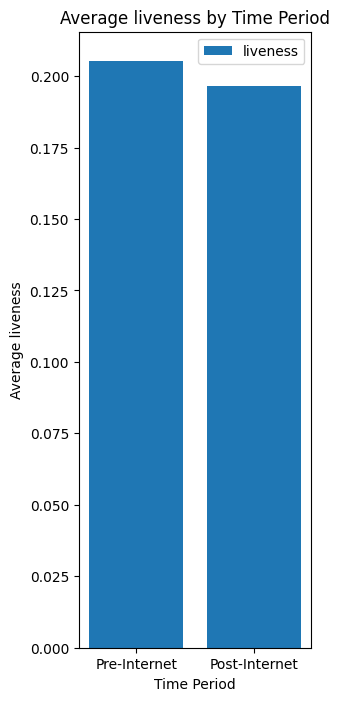

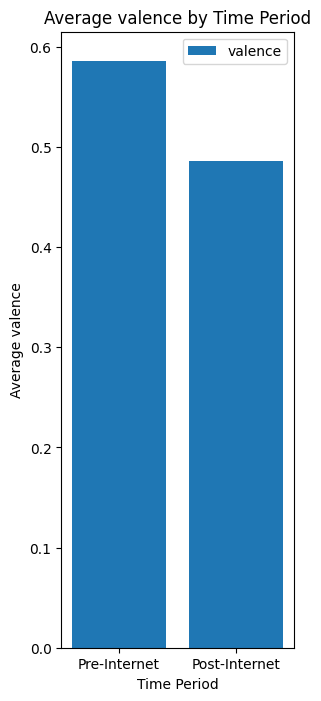

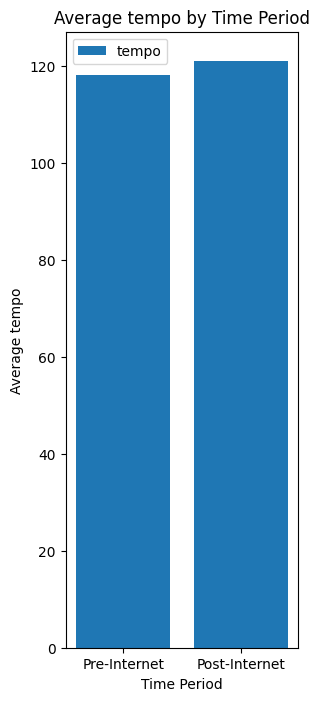

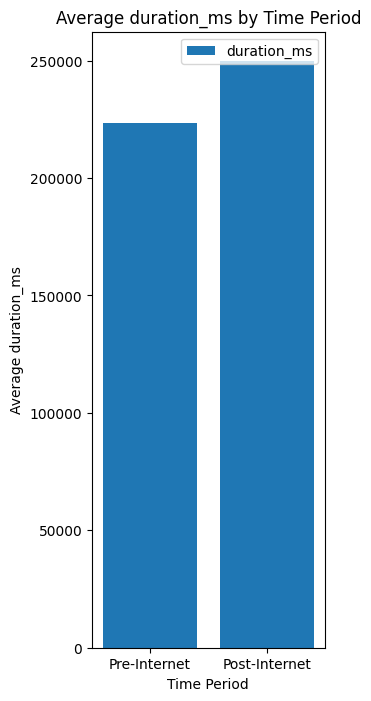

Normal euclidean distant:  0.0
Normal manhattan distance:  0.0
Mean Euclidean Distance:  4.736883645548187
Mean Manhattan Distance:  12.534416720854367


In [ ]:
# QN 3: After the internet came, was there a huge change in the features of the songs?
#       Does the prediction of the popularity of a song change if the internet is taken into account?
df_copy = df.copy()
df_copy['release_decade'] = df_copy['decade'].str[:2].astype(int)
df_copy = df_copy.drop(columns=['decade'])
df_copy

df_copy['pre/post_internet'] = df_copy['release_decade'].apply(
    lambda x: 0 if (x >= 60) & (x < 90) else 1)

features = ['danceability', 'energy', 'key', 'loudness',
            'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df_pre = df_copy[df_copy['pre/post_internet'] == 0]
df_post = df_copy[df_copy['pre/post_internet'] == 1]


for col in features:
    plt.figure(figsize=(3, 8))
    plt.bar([0, 1], [df_pre[col].mean(), df_post[col].mean()], label=col)
    plt.xticks([0, 1], ['Pre-Internet', 'Post-Internet'])
    plt.xlabel('Time Period')
    plt.ylabel('Average ' + col)
    plt.title('Average ' + col + ' by Time Period')
    plt.legend()
    plt.show()

numeric_features = ['danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms']

df_numeric = df_copy[numeric_features]
df_numeric_scaled = ((df_numeric - df_numeric.mean()) / df_numeric.std()).join(df_copy['pre/post_internet'])

df_pre = df_numeric_scaled[df_numeric_scaled['pre/post_internet'] == 0]
df_post = df_numeric_scaled[df_numeric_scaled['pre/post_internet'] == 1]

sample_size = min(df_pre.shape[0], df_post.shape[0])
df_pre_sampled = df_pre.sample(n=sample_size, random_state=42)
df_post_sampled = df_post.sample(n=sample_size, random_state=42)

normal_euclidean_distances = np.linalg.norm(df_pre_sampled[numeric_features].values - df_pre_sampled[numeric_features].values, axis=1)
euclidean_distances = np.linalg.norm(df_pre_sampled[numeric_features].values - df_post_sampled[numeric_features].values, axis=1)
normal_manhattan_distances = np.sum(np.abs(df_pre_sampled[numeric_features].values - df_pre_sampled[numeric_features].values), axis=1)
manhattan_distances = np.sum(np.abs(df_pre_sampled[numeric_features].values - df_post_sampled[numeric_features].values), axis=1)

print("Normal euclidean distant: ", normal_euclidean_distances.mean())
print("Normal manhattan distance: ", normal_manhattan_distances.mean())
print("Mean Euclidean Distance: ", euclidean_distances.mean())
print("Mean Manhattan Distance: ", manhattan_distances.mean())

In [ ]:
X = df_copy[features]
y = df_copy['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

pipeline_internet = make_pipeline(StandardScaler(),
                                  KNeighborsClassifier(n_neighbors=10))
pipeline_internet.fit(X_train, y_train)

y_pred = pipeline_internet.predict(X_test)

scores = cross_val_score(pipeline_internet, X, y, cv=5,
                         scoring='neg_mean_squared_error')

mse_scores = -scores
mae_scores = -cross_val_score(pipeline_internet, X, y, cv=5,
                              scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-scores)
accuracy_scores = cross_val_score(pipeline_internet, X, y,
                                  cv=5, scoring='accuracy')

print("mean mse: ", mse_scores.mean())
print("mean mae: ", mae_scores.mean())
print("mean rmse: ", rmse_scores.mean())
print("mean accuracy: ", accuracy_scores.mean())

X = df_copy[features].join(df_copy['pre/post_internet'])
y = df_copy['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.2, random_state=42)

pipeline_internet = make_pipeline(StandardScaler(),
                                  KNeighborsClassifier(n_neighbors=10))
pipeline_internet.fit(X_train, y_train)

y_pred = pipeline_internet.predict(X_test)

scores = cross_val_score(pipeline_internet, X, y, cv=5,
                         scoring='neg_mean_squared_error')

mse_scores = -scores
mae_scores = -cross_val_score(pipeline_internet, X, y, cv=5,
                              scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-scores)
accuracy_scores = cross_val_score(pipeline_internet, X, y,
                                  cv=5, scoring='accuracy')
print()
print("mean mse with internet: ", mse_scores.mean())
print("mean mae with internet: ", mae_scores.mean())
print("mean rmse with internet: ", rmse_scores.mean())
print("mean accuracy with internet: ", accuracy_scores.mean())

mean mse:  0.27886220847842624
mean mae:  0.27886220847842624
mean rmse:  0.5258179752777866
mean accuracy:  0.7211377915215739

mean mse with internet:  0.26895912355473295
mean mae with internet:  0.26895912355473295
mean rmse with internet:  0.5162663898918212
mean accuracy with internet:  0.7310408764452669


**Question 4:** Can we predict the decade in which a track was released based on its duration and other audio features?

**Data to use:** danceability, energy, instrumentalness, liveness, valence, temp, time signature and duration_ms (duration of the track in milliseconds).

**Approach:** Use StandardScaler and KNN Classifier to classify tracks into different decades.

**Evaluation:** Evaluate accuracy and check confusion matrix, evaluate other metrics such as recall, precision and the appropriate weighted F1 score based on recall and precision.


In [ ]:
# QN 4: Can we predict the decade in which a track was
# released based on its duration and other audio features?

old_features = ['danceability', 'energy', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'decade']

df_track = df[old_features].copy()

features = ['danceability', 'energy', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

df_track['decade_class'] = df_track['decade'].map({
    "60s" : 1, "70s" : 2, "80s" : 3, "90s" : 4,
    "00s" : 5, "10s" : 6
})

X_train, X_test, y_train, y_test = train_test_split(df_track[features],
                                                    df_track['decade_class'],
                                                    test_size=0.2,
                                                    random_state=42)

track_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

params = {
    "kneighborsclassifier__n_neighbors": range(1, 30),
    "kneighborsclassifier__metric" : ['euclidean']
}

track_gs = GridSearchCV(
    track_pipeline,
    param_grid = params,
    cv=5, scoring = 'accuracy'
)
track_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean'],
                         'kneighborsclassifier__n_neighbors': range(1, 30)},
             scoring='accuracy')

In [ ]:
results = pd.DataFrame(track_gs.cv_results_)[[
    'param_kneighborsclassifier__n_neighbors',
                          'param_kneighborsclassifier__metric',
                              'mean_test_score']]

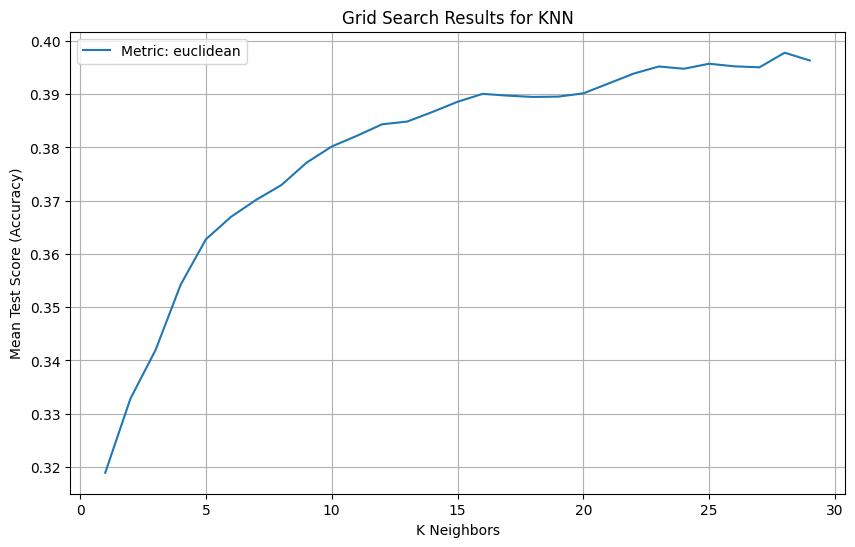

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 28}

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results['param_kneighborsclassifier__n_neighbors'],
             results['mean_test_score'], label='Metric: euclidean')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN')
plt.legend()
plt.grid(True)
plt.show()
track_gs.best_params_

In [ ]:
estimator = track_gs.best_estimator_
y_preds = estimator.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: " + str(accuracy_score(y_test, y_preds)))

Accuracy: 0.40316301703163016


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds, labels=[1,2,3,4,5,6])

array([[1369,  269,   60,   24,   20,   47],
       [ 565,  499,  223,   51,   81,   75],
       [ 273,  312,  394,  124,  133,  143],
       [ 207,  193,  212,  186,  181,  138],
       [ 104,  144,  167,  132,  340,  272],
       [ 139,  144,  122,   78,  273,  526]])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precisions = precision_score(y_test, y_preds,average=None,labels=[1,2,3,4,5,6])
recalls = recall_score(y_test, y_preds,average=None,labels=[1,2,3,4,5,6])

print("Precision of 1960s: " + str(precisions[0]))
print("Recall of 1960s: " + str(recalls[0]))
print("\nPrecision of 1970s: " + str(precisions[1]))
print("Recall of 1970s: " + str(recalls[1]))
print("\nPrecision of 1980s: " + str(precisions[2]))
print("Recall of 1980s: " + str(recalls[2]))
print("\nPrecision of 1990s: " + str(precisions[3]))
print("Recall of 1990s: " + str(recalls[3]))
print("\nPrecision of 2000s: " + str(precisions[4]))
print("Recall of 2000s: " + str(recalls[4]))
print("\nPrecision of 2010s: " + str(precisions[5]))
print("Recall of 2010s: " + str(recalls[5]))

Precision of 1960s: 0.5152427549868273
Recall of 1960s: 0.7652319731693683

Precision of 1970s: 0.3196668802049968
Recall of 1970s: 0.33400267737617134

Precision of 1980s: 0.33446519524617996
Recall of 1980s: 0.2857142857142857

Precision of 1990s: 0.3126050420168067
Recall of 1990s: 0.1665174574753805

Precision of 2000s: 0.33073929961089493
Recall of 2000s: 0.29335634167385677

Precision of 2010s: 0.4379683597002498
Recall of 2010s: 0.41029641185647425


In [ ]:
log_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
results = cross_val_score(
    log_pipeline, X_train, y_train, cv=5, scoring='accuracy'
)
results.mean()

0.3660999185886228

**Question 5:** Are we able to categorize the songs by artist based on their music properties?

**Data to use:** danceability, energy, loudness, speechiness,	acousticness,instrumentalness,	liveness, valence, tempo, and artist

**Approach:** Use StandardScaler and K Means and PCA to try to scale, capture the large variation, and then cluster it by artists.

**Evaluation:** Evaluate clustering quality using Davies-Bouldin index, and visual inspection through t-SNE or PCA.


In [ ]:
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


In [ ]:
# QN 5: Are we able to cluster the songs by artist based on
#their music properties?
features = ["danceability", "energy", "loudness", "speechiness",	"acousticness",
            "instrumentalness",	"liveness", "valence", "tempo"]
singers = ["Celia Cruz", "Maria Teresa Luciani", "Big Joe Williams",
           "Astrud Gilberto", "Montgomery Gentry", "Katy Perry"]

df1 = df.loc[df["artist"].isin(singers)]
df1


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706000,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
312,Guantanamera,Celia Cruz,spotify:track:6bNZH4O72jD4L5hga6DwHj,0.734,0.458,10,-9.193,1,0.0585,0.844000,0.000150,0.3540,0.900,140.200,175240,4,32.86039,11,0,60s
682,La Jaibera,Celia Cruz,spotify:track:14vI3A7Q6XBQ4f7Ma52f6P,0.721,0.535,8,-8.883,1,0.1460,0.794000,0.000000,0.3400,0.834,151.440,144787,4,48.32174,6,0,60s
765,Es La Humanidad,Celia Cruz,spotify:track:7CrBtl6VpTjuFaKbpu9YvI,0.541,0.329,3,-7.756,1,0.0303,0.734000,0.000000,0.2450,0.501,104.132,144773,4,53.66651,7,0,60s
1029,Retozón,Celia Cruz,spotify:track:5bkxrRV46w1BrjYk7Ar1OX,0.647,0.601,9,-8.988,1,0.0538,0.911000,0.077200,0.2110,0.965,145.903,174293,4,28.11185,7,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38680,Rise,Katy Perry,spotify:track:1CwNogTShsnsn1C8UhRmYX,0.553,0.639,11,-6.445,1,0.0458,0.046800,0.000000,0.1070,0.442,101.418,203475,4,41.23498,9,1,10s
39800,Firework,Katy Perry,spotify:track:4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.139000,0.000000,0.0803,0.649,124.072,227880,4,42.16812,10,1,10s
40518,The One That Got Away,Katy Perry,spotify:track:3oL3XRtkP1WVbMxf7dtTdu,0.687,0.792,1,-4.023,0,0.0353,0.000802,0.000000,0.2000,0.864,133.962,227333,4,31.54783,10,1,10s
40565,This Is How We Do,Katy Perry,spotify:track:5vL0yvddknhGj7IrBc6UTj,0.690,0.636,9,-6.028,0,0.0457,0.020300,0.000000,0.1470,0.800,96.000,204285,4,20.53821,9,1,10s


In [ ]:
scaler = StandardScaler()
standardized = scaler.fit_transform(df1[features])
Km = KMeans(n_clusters=6, init="random", n_init=5, random_state=50)
Km.fit(standardized)

KMeans(init='random', n_clusters=6, n_init=5, random_state=50)

In [ ]:
clusters = Km.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 2, 2, 0, 5, 5, 4, 3, 0, 5, 4, 2, 1, 2, 3, 1, 3, 5, 0, 4, 4, 4,
       4, 0, 2, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5], dtype=int32)

Davies-Bouldin Index: 1.0520337028888063


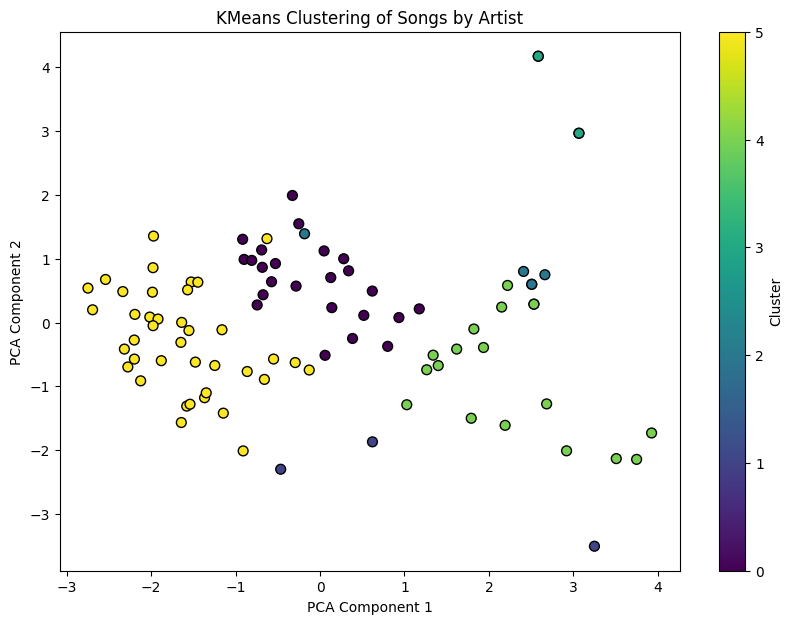

In [ ]:
# Add cluster labels to the dataframe
df1.loc[:, 'cluster'] = clusters

from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized)

db_index = davies_bouldin_score(standardized, clusters)
print(f'Davies-Bouldin Index: {db_index}')

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o',
            edgecolor='k', s=50)
plt.title('KMeans Clustering of Songs by Artist')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>